In [1]:
import pandas as pd 
import numpy as np 
import math 
import matplotlib.pyplot as plt
from pathlib import Path

## Exponential growth

The most basic form of an exponent is as follows. It's probably easier to explain by just showing a few examples 

$b^a = n$

In [12]:
# 10 raised to what power gives 100? 
print(math.log10(100))

#This means we can do 10^2 and we should get 100: 
print(10**2)

#math.log(x) by default uses the natural logarithm, with base e 
print(round(math.log(5),2))

2.0
100
1.61


This is some made up data, but it shows how quickly numbers can grow when the exponent is increased: 

In [38]:
data = [1,2,3,4,5,6]
a = pd.Series(data)
exponential_series = a ** a 

exponential_series

0        1
1        4
2       27
3      256
4     3125
5    46656
dtype: int64

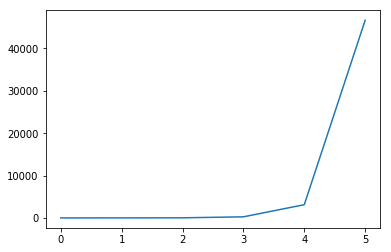

In [39]:
exponential_series.plot() 

The data below is from the USGS (https://earthquake.usgs.gov/earthquakes/search/). I'm not a seismologist, so apologies for any obvious mistakes. But the Richter scale, used to measure earthquake intensity, is a logarithmic scale rather than linear. To solve for Energy, I've used the inverse of the logarithm, the exponential function. 

In [3]:
file2 = Path(r'C:\Users\Will Tirone\Desktop\Stats_Projects\query.csv')
quake_data = pd.read_csv(file2)

# cleaning the data; just want the magnitude column
quake_data['Energy (Joules)'] = 10**(4.8 + (1.5 * quake_data.mag)) 

If we know the magnitude, we can find the energy given by this equation, taken from 
https://www.bgs.ac.uk/discoveringGeology/hazards/earthquakes/magnitudeScaleCalculations.html

$\log(Energy) = 4.8 + 1.5M$

In [4]:
energies = quake_data[['mag', 'Energy (Joules)']]
energies.head() 

,mag,Energy (Joules)
0,4.7,7.079458e+11
1,4.9,1.412538e+12
2,3.1,2.818383e+09
3,4.6,5.011872e+11
4,4.7,7.079458e+11


Text(0.5, 0, 'Energy (Joules)')

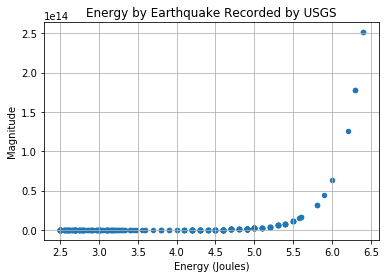

In [5]:
ax = energies.plot.scatter(x='mag', y='Energy (Joules)', grid=True)
plt.title('Energy by Earthquake Recorded by USGS')

ax.set_ylabel('Magnitude')
ax.set_xlabel('Energy (Joules)')